## Task 3: Prediction using Decision Tree Algorithm 
### By: Syed Nadeem Haque
#### Problem Statement
● Create the Decision Tree classifier and visualize it graphically.<br> 
● The purpose is if we feed any new data to this  classifier, it would be able to predict the right class accordingly. 

In [1]:
# Importing all libraries required
# supress Warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Reading data from remote link
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### Data imported successfully.

### Data Cleaning

In [3]:
# inspecting the Dataframe
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000  

##### ``1 There are total 150 rows and 6 columns in the dataset.
##### ``2 The column names are "sepal length", "sepal width", "petal length" & "petal width".
##### ``3 All the four columns are float datatype.
##### ``4 Sepal length min 4.3, max 7.9, Sepal width min 2, max 4.4, Petal length min 1, max 6.9 and Petal width min 0.1, max 2.5.

In [4]:
# finding the sum of Null values in the Dataframe
print (df.isnull().sum())  
print (df.isnull().values.any())
print (df.isnull().values.sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
False
0


##### There are no missing values in the dataset.

### EDA

In [5]:
# "Id" column is not required for modelling
df.drop(columns="Id",inplace=True)

##### 'Id' column dropped .

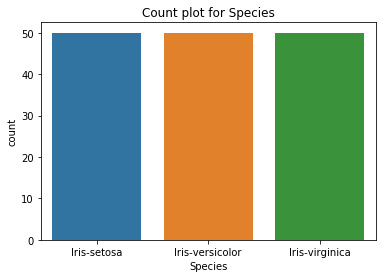

In [6]:
# plotting the count plot of "Species"
sns.countplot(x="Species", data=df)
plt.title("Count plot for Species")
plt.show()

##### There are total three Species namely "Iris-setosa", "Iris-versicolor" & "Iris-virginica".

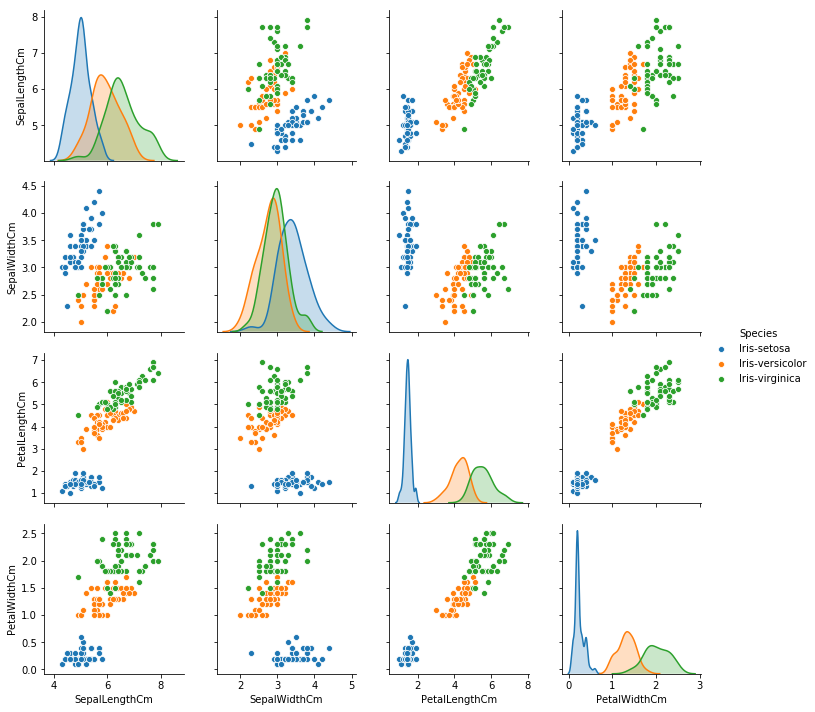

In [7]:
# Pair plot for pairwise relation
sns.pairplot(data=df, hue='Species')

##### The pairplot graph gives us the pair wair relationship, from the above graph we can see that "Iris-setosa" species differ from the other two species in terms of relationship.

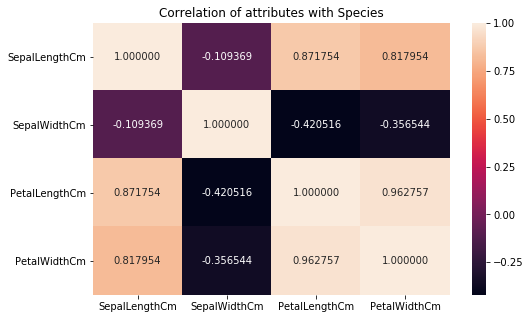

In [8]:
# Correlation among the attributes plotting using a HeatMap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(),annot=True,fmt="f").set_title("Correlation of attributes with Species")
plt.show()

##### The 'PetalWidth' and 'PetalLength' are correlated with each other and 'SepalWidth' and 'SepalLength' are not correlated as shown in the heatmap.

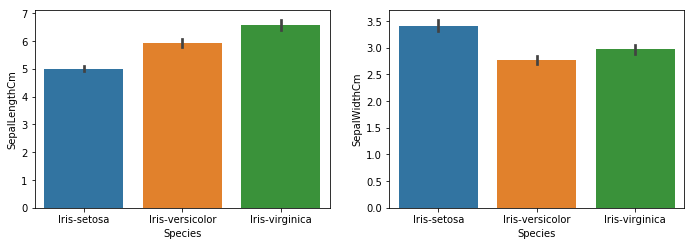

In [9]:
# Bar plot for Sepal Length and Width
plt.figure(figsize=(18, 8))
plt.subplot(2,3,1)
sns.barplot(x="Species", y="SepalLengthCm", data=df)
plt.subplot(2,3,2)
sns.barplot(x="Species", y="SepalWidthCm", data=df)
plt.show()

##### For the Sepal length "Iris-virginica" are high while for Sepal width "Iris-setosa" are high on number.

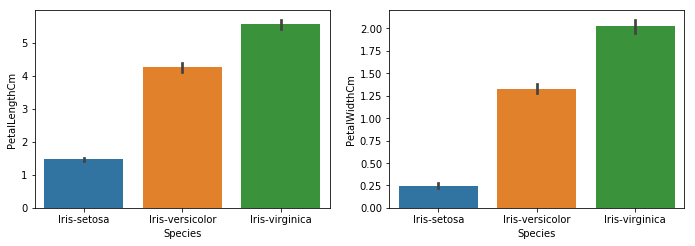

In [10]:
# Bar plot for Petal Length and Width
plt.figure(figsize=(18, 8))
plt.subplot(2,3,1)
sns.barplot(x="Species", y="PetalLengthCm", data=df)
plt.subplot(2,3,2)
sns.barplot(x="Species", y="PetalWidthCm", data=df)

##### For both Petal length and Petal width "Iris-virginica" have got the highest number with "Iris-setosa" seems to the lowest on both.

### Building the Model

In [11]:
# Putting feature variable to X
X = df.drop('Species',axis=1)

# Putting response variable to y
y = df['Species']

In [12]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)

##### Dataset spitted successfully into train and test.

In [13]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Model training successful.

In [14]:
# Let's check the evaluation metrics of our default model
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred = dt.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

    avg / total       0.96      0.96      0.96        45



In [15]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
0.9555555555555556


##### Average Precision is 96%, Recall is 96%, f1 score is 96%, Accuracy score is 95%.

#### Plotting the the Decision Tree

In [16]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[1:])
features

['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [17]:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

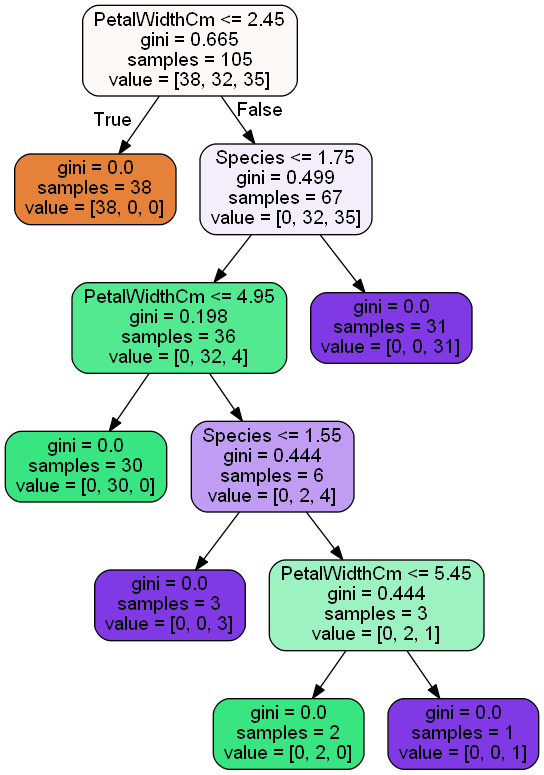

In [18]:
# plotting the tree 
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##### The resulted Decision tree.

###  If any new data is added to this classifier, it should be able to predict the right class accordingly. Let's Check: 

In [19]:
# Feeding any random data to model
new_random_data = [[5.8,3.05,3.7,1.19]]
pred =dt.predict(new_random_data)
print(pred)

['Iris-versicolor']


##### Successfully predicted.

### Conclusion
##### `` 1. Successfully trained and ploted the Decision Tree.
##### `` 2. The Evaluation scores are on Average Precision is 96%, Recall is 96%, f1 score is 96% and Accuracy score is 95%.
##### `` 3. New random data is feed to the model and the prediction is correct. 

### Thank You